## Exports aggregated for all countries

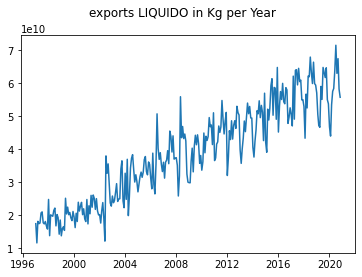

<Figure size 432x288 with 0 Axes>

In [30]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
filename = "./data/EXP_COMPLETA.zip"
chunksize = 10 ** 6

def process(chunk):
  df = chunk
  df['Date'] = pd.to_datetime(df.CO_ANO.astype(str) + '/' + df.CO_MES.astype(str) + '/01')
  res = df.groupby(['Date']).agg('sum').reset_index()[['Date', 'KG_LIQUIDO']]
  return res
frames = []
with pd.read_csv(filename, sep=";" ,chunksize=chunksize, squeeze=True) as reader:
    for chunk in reader:
        frames.append(process(chunk))
df = pd.concat(frames).groupby(['Date']).agg('sum').reset_index()
plt.suptitle('exports LIQUIDO in Kg per Year')
plt.plot(df.Date, df.KG_LIQUIDO)
plt.figure()
plt.show()

### Total Exports in USD timeseries

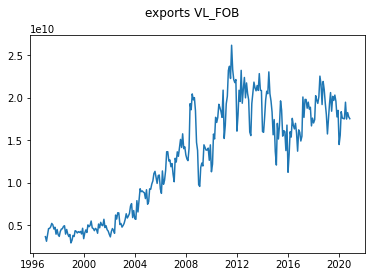

<Figure size 432x288 with 0 Axes>

In [6]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
filename = "./data/EXP_COMPLETA.zip"
chunksize = 10 ** 6

def process(chunk):
  df = chunk
  df['Date'] = pd.to_datetime(df.CO_ANO.astype(str) + '/' + df.CO_MES.astype(str) + '/01')
  res = df.groupby(['Date']).agg('sum').reset_index()[['Date', 'VL_FOB']]
  return res
frames = []
with pd.read_csv(filename, sep=";" ,chunksize=chunksize, squeeze=True) as reader:
    for chunk in reader:
        frames.append(process(chunk))
df = pd.concat(frames).groupby(['Date']).agg('sum').reset_index()
plt.suptitle('exports VL_FOB')
plt.plot(df.Date, df.VL_FOB)
plt.figure()
plt.show()

    CO_PAIS       VL_FOB
44      160  63191994262
69      249  19020221673
12       63   7688407809
161     573   6992638437
66      245   3864919709
0    others  90797441847


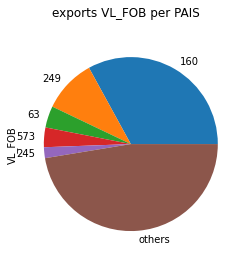

<Figure size 432x288 with 0 Axes>

In [40]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
filename = "./data/EXP_COMPLETA.zip"
chunksize = 10 ** 6

def process(chunk):
  condition = (chunk.CO_ANO == 2020)
  df = chunk[condition]
  res = df.groupby(['CO_PAIS']).agg('sum').reset_index()[['VL_FOB', 'CO_PAIS']]
  return res
frames = []
with pd.read_csv(filename, sep=";" ,chunksize=chunksize, squeeze=True) as reader:
    for chunk in reader:
        frames.append(process(chunk))
df = pd.concat(frames).groupby(['CO_PAIS']).agg('sum').reset_index().sort_values('VL_FOB', ascending = False)
max_countries = 5
df2 = df[:max_countries].copy()
new_row = pd.DataFrame(data = {
    'CO_PAIS' : ['others'],
    'VL_FOB' : [df['VL_FOB'][max_countries:].sum()]
})
df3 = pd.concat([df2, new_row])
print(df3)
plt.suptitle('exports VL_FOB per PAIS')
df3.VL_FOB.plot.pie(labels=df3.CO_PAIS)
plt.figure()
plt.show()